In [1]:
#%matplotlib notebook
!jupyter nbextension enable --py gmaps

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [2]:
import csv, os, requests, time, gmaps, pandas as pd, matplotlib.pyplot as plt, numpy as np
from config import *
gmaps.configure(api_key=gkey)

In [3]:
yelpapi_csv = os.path.join("yelpapidata.csv")
yelp_raw = pd.read_csv(yelpapi_csv)
yelp_raw.head()

,search_city,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph
0,"Montgomery, Alabama",American,BhPj9fLZph1TcofvuTZT1w,Urban Cookhouse,https://s3-media1.fl.yelpcdn.com/bphoto/XY8xxa...,https://www.yelp.com/biz/urban-cookhouse-montg...,False,142,4.5,$,32.360651,-86.157520,7712 Eastchase Pkwy,Montgomery,AL,36117,US,(334) 239-7801
1,"Montgomery, Alabama",American,4uVYV49MDmm3tunRg6hnew,Stockyard Grill,https://s3-media2.fl.yelpcdn.com/bphoto/gfK2DK...,https://www.yelp.com/biz/stockyard-grill-montg...,False,51,4.5,$,32.317361,-86.350667,4500 Mobile Hwy,Montgomery,AL,36108,US,(334) 288-2575
2,"Montgomery, Alabama",American,s2uIZz572lvzeeaT40xm5g,Plantation House and Garden,https://s3-media3.fl.yelpcdn.com/bphoto/E4UqZ2...,https://www.yelp.com/biz/plantation-house-and-...,False,14,4.0,$$,32.479502,-86.369687,3240 Grandview Rd,Millbrook,AL,36054,US,(334) 285-1466
3,"Montgomery, Alabama",American,TmPADgXsze5_gfTZPZ24vQ,Southern Comfort,https://s3-media2.fl.yelpcdn.com/bphoto/3WRpNu...,https://www.yelp.com/biz/southern-comfort-hope...,False,193,4.5,$$,32.269824,-86.363997,210 Wasden Rd,Hope Hull,AL,36043,US,(334) 280-0012
4,"Montgomery, Alabama",American,u-pZS8ZvEm8QwJIMrf1Wbw,Common Bond Brewers,https://s3-media3.fl.yelpcdn.com/bphoto/xNl0HP...,https://www.yelp.com/biz/common-bond-brewers-m...,False,16,5.0,$,32.377410,-86.313590,424 Bibb St,Montgomery,AL,36104,US,(334) 676-2287


In [4]:
yelp_raw.describe()

,review_count,rating,lat,long
count,27851.000000,27851.000000,27850.000000,27850.000000
mean,177.127679,3.967398,38.425217,-92.894844
std,292.762941,0.604082,5.160674,18.784798
min,1.000000,1.000000,21.262370,-158.105524
25%,30.000000,3.500000,35.493787,-104.917115
50%,88.000000,4.000000,39.667450,-89.220339
75%,212.000000,4.500000,41.822154,-78.533204
max,9460.000000,5.000000,58.398782,157.941630


In [5]:
yelp_format_rd1 = yelp_raw.copy()
#yelp_format_rd1["review_count"] = yelp_format_rd1.loc[:, "review_count"].astype(float)
#yelp_format_rd1["rating"] = yelp_format_rd1.loc[:, "rating"].astype(float)
yelp_format_rd1['price_attribute'] = yelp_format_rd1['price'].replace(
    {'$': '1.Affordable', '$$': '2.Moderate', '$$$': '3.Expensive'})
yelp_format_rd1['price_level'] = yelp_format_rd1['price'].replace(
    {'$': 1, '$$': 2, '$$$': 3})
yelp_format_rd1 = yelp_format_rd1[yelp_format_rd1['country'] == 'US']
yelp_format_rd1.head()

,search_city,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph,price_attribute,price_level
0,"Montgomery, Alabama",American,BhPj9fLZph1TcofvuTZT1w,Urban Cookhouse,https://s3-media1.fl.yelpcdn.com/bphoto/XY8xxa...,https://www.yelp.com/biz/urban-cookhouse-montg...,False,142,4.5,$,32.360651,-86.157520,7712 Eastchase Pkwy,Montgomery,AL,36117,US,(334) 239-7801,1.Affordable,1
1,"Montgomery, Alabama",American,4uVYV49MDmm3tunRg6hnew,Stockyard Grill,https://s3-media2.fl.yelpcdn.com/bphoto/gfK2DK...,https://www.yelp.com/biz/stockyard-grill-montg...,False,51,4.5,$,32.317361,-86.350667,4500 Mobile Hwy,Montgomery,AL,36108,US,(334) 288-2575,1.Affordable,1
2,"Montgomery, Alabama",American,s2uIZz572lvzeeaT40xm5g,Plantation House and Garden,https://s3-media3.fl.yelpcdn.com/bphoto/E4UqZ2...,https://www.yelp.com/biz/plantation-house-and-...,False,14,4.0,$$,32.479502,-86.369687,3240 Grandview Rd,Millbrook,AL,36054,US,(334) 285-1466,2.Moderate,2
3,"Montgomery, Alabama",American,TmPADgXsze5_gfTZPZ24vQ,Southern Comfort,https://s3-media2.fl.yelpcdn.com/bphoto/3WRpNu...,https://www.yelp.com/biz/southern-comfort-hope...,False,193,4.5,$$,32.269824,-86.363997,210 Wasden Rd,Hope Hull,AL,36043,US,(334) 280-0012,2.Moderate,2
4,"Montgomery, Alabama",American,u-pZS8ZvEm8QwJIMrf1Wbw,Common Bond Brewers,https://s3-media3.fl.yelpcdn.com/bphoto/xNl0HP...,https://www.yelp.com/biz/common-bond-brewers-m...,False,16,5.0,$,32.377410,-86.313590,424 Bibb St,Montgomery,AL,36104,US,(334) 676-2287,1.Affordable,1


In [6]:
yelp_format_rd1.columns

Index(['search_city', 'search_cuisine', 'y_id', 'name', 'image_url', 'url',
       'closed', 'review_count', 'rating', 'price', 'lat', 'long', 'add1',
       'city', 'state', 'zip_code', 'country', 'disp_ph', 'price_attribute',
       'price_level'],
      dtype='object')

In [7]:
yelp_format_rd1.count()

search_city        27842
search_cuisine     27842
y_id               27842
name               27842
image_url          27526
url                27842
closed             27842
review_count       27842
rating             27842
price              23724
lat                27841
long               27841
add1               27487
city               27842
state              27842
zip_code           27813
country            27842
disp_ph            27243
price_attribute    23724
price_level        23724
dtype: int64

In [8]:
yelp_format_rd1.dtypes

search_city         object
search_cuisine      object
y_id                object
name                object
image_url           object
url                 object
closed                bool
review_count         int64
rating             float64
price               object
lat                float64
long               float64
add1                object
city                object
state               object
zip_code            object
country             object
disp_ph             object
price_attribute     object
price_level         object
dtype: object

In [9]:
yelp_gb_cities = yelp_format_rd1.groupby(['search_city'])
yelp_gb_cities.sum().head()

,closed,review_count,rating,lat,long
search_city,,,,,
"Albany, New York",False,61218,2506.0,27242.467834,-47077.268325
"Annapolis, Maryland",False,96385,1912.0,19436.953223,-38130.413818
"Atlanta, Georgia",False,287240,3898.0,32554.059412,-81150.804242
"Augusta, Maine",False,15428,1016.0,11643.306490,-18339.187788
"Austin, Texas",False,299061,3792.0,27810.980645,-89635.319822


In [10]:
yelp_gb_cuisines = yelp_format_rd1.groupby(['search_cuisine'])
yelp_gb_cuisines.sum().head()

,closed,review_count,rating,lat,long
search_cuisine,,,,,
American,0.0,658067,9574.5,93656.108174,-222832.643590
Cajun,0.0,364110,5698.0,56090.625394,-139019.652525
Caribbean,0.0,89118,3076.5,29400.857891,-67666.580093
Chinese,0.0,215002,7071.0,73497.901854,-178476.610595
French,0.0,251601,4517.5,43102.898712,-105380.021478


In [11]:
yelp_gb_price = yelp_format_rd1.groupby(['price'])
yelp_gb_price.sum().head()

,closed,review_count,rating,lat,long
price,,,,,
$,2.0,734909,26171.5,257213.469331,-6.168265e+05
$$,0.0,3755842,62684.0,611843.526283,-1.491098e+06
$$$,0.0,334326,4027.0,38330.086618,-9.183231e+04
$$$$,0.0,30459,460.0,3951.409992,-1.070779e+04


In [12]:
yelp_gb_citiescount = yelp_format_rd1.groupby(['search_city'])
yelp_gb_citiescount.count().head()

,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph,price_attribute,price_level
search_city,,,,,,,,,,,,,,,,,,,
"Albany, New York",638,638,638,628,638,638,638,638,531,638,638,632,638,638,638,638,622,531,531
"Annapolis, Maryland",498,498,498,496,498,498,498,498,437,498,498,490,498,498,498,498,493,437,437
"Atlanta, Georgia",962,962,962,960,962,962,962,962,851,962,962,960,962,962,962,962,947,851,851
"Augusta, Maine",263,263,263,253,263,263,263,263,210,263,263,263,263,263,263,263,260,210,210
"Austin, Texas",917,917,917,915,917,917,917,917,768,917,917,910,917,917,916,917,890,768,768


In [13]:
yelp_gb_cuisinescount = yelp_format_rd1.groupby(['search_cuisine'])
yelp_gb_cuisinescount.count().head()

,search_city,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph,price_attribute,price_level
search_cuisine,,,,,,,,,,,,,,,,,,,
American,2396,2396,2396,2368,2396,2396,2396,2396,2039,2396,2396,2392,2396,2396,2396,2396,2346,2039,2039
Cajun,1491,1491,1491,1479,1491,1491,1491,1491,1281,1491,1491,1470,1491,1491,1491,1491,1451,1281,1281
Caribbean,763,763,763,738,763,763,763,763,532,763,763,723,763,763,760,763,734,532,532
Chinese,1914,1914,1914,1887,1914,1914,1914,1914,1716,1914,1914,1912,1914,1914,1913,1914,1883,1716,1716
French,1118,1118,1118,1111,1118,1118,1118,1118,1018,1118,1118,1111,1118,1118,1117,1118,1097,1018,1018


In [14]:
yelp_gb_citiesavg = yelp_format_rd1.groupby(['search_city'])
yelp_gb_citiesavg.mean().head()

,closed,review_count,rating,lat,long
search_city,,,,,
"Albany, New York",0.0,95.952978,3.927900,42.699793,-73.788822
"Annapolis, Maryland",0.0,193.544177,3.839357,39.030027,-76.567096
"Atlanta, Georgia",0.0,298.586279,4.051975,33.839979,-84.356345
"Augusta, Maine",0.0,58.661597,3.863118,44.271127,-69.730752
"Austin, Texas",0.0,326.129771,4.135224,30.328223,-97.748440


In [15]:
yelp_gb_cuisinesavg = yelp_format_rd1.groupby(['search_cuisine'])
yelp_gb_cuisinesavg.mean().head()

,closed,review_count,rating,lat,long
search_cuisine,,,,,
American,0.0,274.652337,3.996035,39.088526,-93.001938
Cajun,0.0,244.205231,3.821596,37.619467,-93.239204
Caribbean,0.0,116.799476,4.032110,38.533234,-88.684902
Chinese,0.0,112.331243,3.694357,38.400158,-93.247968
French,0.0,225.045617,4.040698,38.553577,-94.257622


In [16]:
yelp_gb2_citiesavg = yelp_format_rd1.groupby(['search_city','search_cuisine'])
yelp_gb2_citiesavg.mean().head()

closed  review_count    rating        lat  \
search_city      search_cuisine                                              
Albany, New York American           0.0    138.660000  4.090000  42.687656   
                 Cajun              0.0    134.363636  3.681818  42.712528   
                 Caribbean          0.0     21.583333  3.625000  42.700434   
                 Chinese            0.0     85.920000  3.570000  42.686607   
                 French             0.0     71.071429  3.964286  42.704651   

                                      long  
search_city      search_cuisine             
Albany, New York American       -73.781079  
                 Cajun          -73.783241  
                 Caribbean      -73.791653  
                 Chinese        -73.793954  
                 French         -73.786837

In [17]:
yelp_gb2_cuisinesavg = yelp_format_rd1.groupby(['search_cuisine','search_city'])
yelp_gb2_cuisinesavg.mean().head()

closed  review_count  rating        lat  \
search_cuisine search_city                                                    
American       Albany, New York        0.0        138.66    4.09  42.687656   
               Annapolis, Maryland     0.0        281.00    3.99  38.976601   
               Atlanta, Georgia        0.0        708.70    4.20  33.799748   
               Augusta, Maine          0.0         47.28    4.00  44.354949   
               Austin, Texas           0.0        657.44    4.24  30.331474   

                                         long  
search_cuisine search_city                     
American       Albany, New York    -73.781079  
               Annapolis, Maryland -76.507178  
               Atlanta, Georgia    -84.392725  
               Augusta, Maine      -69.726458  
               Austin, Texas       -97.749226

In [18]:
yelp_gb3_citiesavg = yelp_format_rd1.groupby(['search_city','search_cuisine'])
yelp_gb3_citiesavg.mean().head()

closed  review_count    rating        lat  \
search_city      search_cuisine                                              
Albany, New York American           0.0    138.660000  4.090000  42.687656   
                 Cajun              0.0    134.363636  3.681818  42.712528   
                 Caribbean          0.0     21.583333  3.625000  42.700434   
                 Chinese            0.0     85.920000  3.570000  42.686607   
                 French             0.0     71.071429  3.964286  42.704651   

                                      long  
search_city      search_cuisine             
Albany, New York American       -73.781079  
                 Cajun          -73.783241  
                 Caribbean      -73.791653  
                 Chinese        -73.793954  
                 French         -73.786837

In [19]:
yelp_gb3_cuisinesavg = yelp_format_rd1.groupby(['search_cuisine','search_city'])
yelp_gb3_cuisinesavg.mean().head()

closed  review_count  rating        lat  \
search_cuisine search_city                                                    
American       Albany, New York        0.0        138.66    4.09  42.687656   
               Annapolis, Maryland     0.0        281.00    3.99  38.976601   
               Atlanta, Georgia        0.0        708.70    4.20  33.799748   
               Augusta, Maine          0.0         47.28    4.00  44.354949   
               Austin, Texas           0.0        657.44    4.24  30.331474   

                                         long  
search_cuisine search_city                     
American       Albany, New York    -73.781079  
               Annapolis, Maryland -76.507178  
               Atlanta, Georgia    -84.392725  
               Augusta, Maine      -69.726458  
               Austin, Texas       -97.749226

In [20]:
#This is where we are going to start charting, I have provided some exmaples for you. 

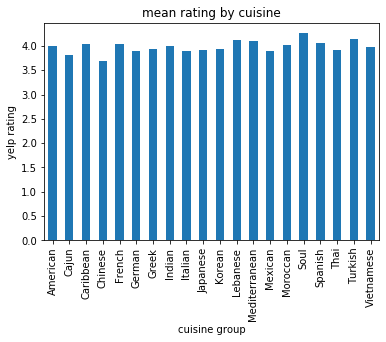

<Figure size 432x288 with 0 Axes>

In [21]:
chartme1 = yelp_gb_cuisinesavg['rating'].mean()
cuisine_chart = chartme1.plot(kind='bar', title='mean rating by cuisine')
cuisine_chart.set_xlabel("cuisine group")
cuisine_chart.set_ylabel("yelp rating")

plt.show()
plt.tight_layout()

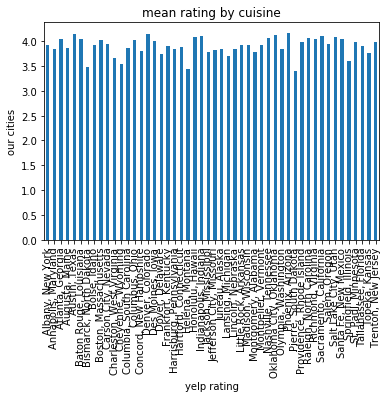

<Figure size 432x288 with 0 Axes>

In [22]:
chartme2 = yelp_gb_citiesavg['rating'].mean()
cuisine_chart = chartme2.plot(kind='bar', title='mean rating by cuisine')
cuisine_chart.set_xlabel("yelp rating")
cuisine_chart.set_ylabel('our cities')

plt.show()
plt.tight_layout()

In [23]:
#For Clinton

In [24]:
variable = yelp_gb_cuisinescount['review_count'].sum()
variable

#cuisines_label = variable['search_cuisine'].values.tolist()
#cuisines_label

search_cuisine
American         658067
Cajun            364110
Caribbean         89118
Chinese          215002
French           251601
German           159661
Greek            194577
Indian           179826
Italian          384256
Japanese         332929
Korean           258820
Lebanese         153168
Mediterranean    192793
Mexican          345886
Moroccan          80659
Soul             195123
Spanish          197642
Thai             287367
Turkish          150554
Vietnamese       240561
Name: review_count, dtype: int64

In [25]:
specific_city = 'Albany, New York'
yelp_gb_cc_city = yelp_format_rd1
yelp_gb_cc_city = yelp_gb_cc_city[yelp_gb_cc_city['search_city'] == specific_city].groupby(['search_cuisine'])
variable2 = yelp_gb_cc_city['review_count'].sum()
variable2

search_cuisine
American         6933
Cajun            2956
Caribbean         518
Chinese          4296
French            995
German           1550
Greek            3446
Indian           2665
Italian          5191
Japanese         5136
Korean           4701
Lebanese          827
Mediterranean    2366
Mexican          5253
Moroccan         1036
Soul             2239
Spanish           857
Thai             5403
Turkish          1018
Vietnamese       3832
Name: review_count, dtype: int64

In [26]:
# For Nell

In [27]:
specific_city = 'Albany, New York'
yelp_gmaps = yelp_format_rd1
yelp_gmaps = yelp_gmaps[yelp_gmaps['search_city'] == specific_city]
yelp_gmaps = yelp_gmaps[['lat','long','review_count']]
yelp_gmaps.count()

lat             638
long            638
review_count    638
dtype: int64

In [28]:
heatmap_layer = gmaps.heatmap_layer(
    yelp_gmaps[['lat','long']],
    weights=yelp_gmaps['review_count'],
    max_intensity=100,
    point_radius=9.0
)

In [29]:
fig = gmaps.figure()
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Start of the Data Processing Pieces / Consolidated


In [30]:
yelp_gmaps_1 = yelp_format_rd1[['lat','long','review_count']]
yelp_gmaps_1 = yelp_gmaps_1[yelp_gmaps_1['lat'] > 0]
yelp_gmaps_1.count()

lat             27841
long            27841
review_count    27841
dtype: int64

In [31]:
heatmap_layer = gmaps.heatmap_layer(
    yelp_gmaps_1[['lat','long']],
    weights=yelp_gmaps_1['review_count'],
    max_intensity=50,
    point_radius=5.0
)

In [32]:
fig = gmaps.figure()
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [33]:
# Count of reviews based on cuisine
nicole = pd.DataFrame(yelp_gb_cuisinescount['review_count'].sum())
result = nicole.sort_values(['review_count'], ascending=False) 
result

,review_count
search_cuisine,
American,658067
Italian,384256
Cajun,364110
Mexican,345886
Japanese,332929
Thai,287367
Korean,258820
French,251601
Vietnamese,240561


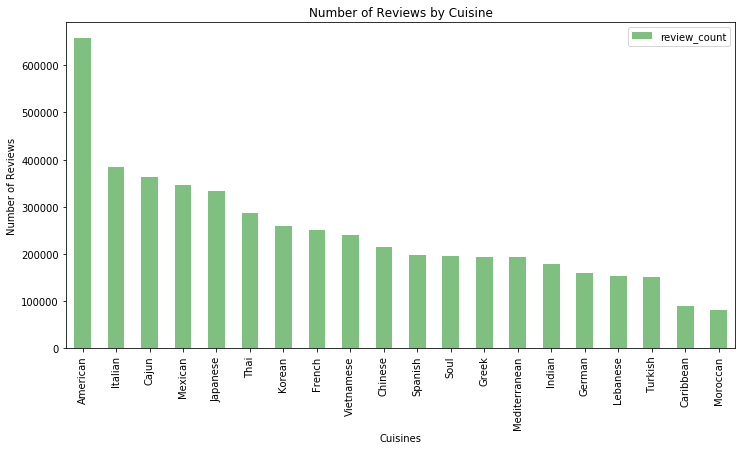

<Figure size 864x432 with 0 Axes>

In [34]:
plt.rcParams['figure.figsize'] = (12,6)
nicole = pd.DataFrame(yelp_gb_cuisinescount['review_count'].sum())
nicole = nicole.sort_values(['review_count'], ascending=False) 
cuisine_chart = nicole.plot(kind='bar', color='g', alpha=0.5, align="center", title='Number of Reviews by Cuisine')
cuisine_chart.set_xlabel("Cuisines")
cuisine_chart.set_ylabel('Number of Reviews')
plt.savefig('reviewcountbycuisine.png')
plt.show()
plt.tight_layout()

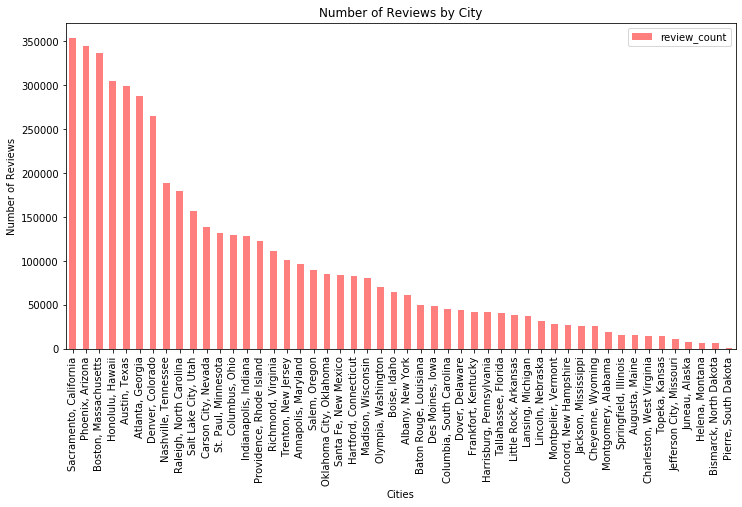

<Figure size 864x432 with 0 Axes>

In [35]:
plt.rcParams['figure.figsize'] = (12,6)
nicole = pd.DataFrame(yelp_gb_citiescount['review_count'].sum())
nicole = nicole.sort_values(['review_count'], ascending=False) 
city_chart = nicole.plot(kind='bar', color='r', alpha=0.5, align="center", title='Number of Reviews by City')
city_chart.set_xlabel("Cities")
city_chart.set_ylabel('Number of Reviews')
plt.savefig('reviewcountbycities.png')
plt.show()
plt.tight_layout()

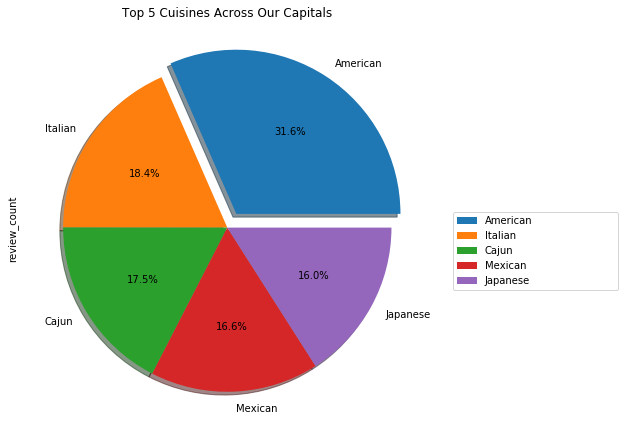

In [36]:
nicole = pd.DataFrame(yelp_gb_cuisinescount['review_count'].sum())
nicole = nicole.sort_values('review_count', ascending=False).head(5)
nicole.plot(kind="pie", subplots = True, autopct="%1.1f%%", shadow=True, explode=(0.1,0,0,0,0))
plt.tight_layout()
plt.title("Top 5 Cuisines Across Our Capitals")
plt.legend(bbox_to_anchor=(1., .3, .5, .1), loc='lower right', ncol=1, mode="expand", borderaxespad=2.)
plt.savefig('top5cuisines.png')
plt.show()

In [37]:
nicole

,review_count
search_cuisine,
American,658067
Italian,384256
Cajun,364110
Mexican,345886
Japanese,332929


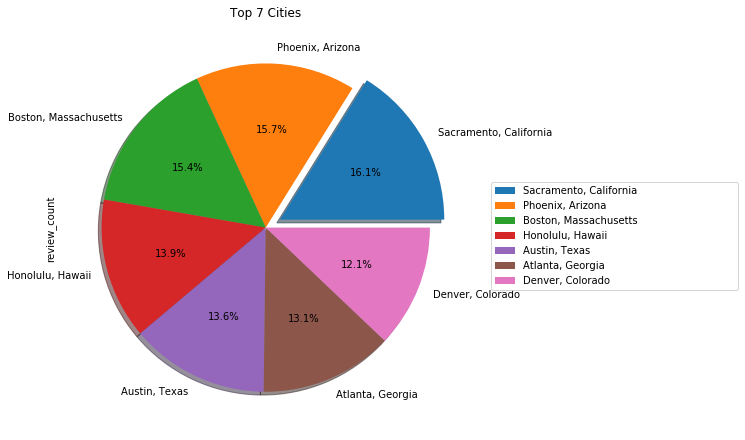

In [38]:
nicole = pd.DataFrame(yelp_gb_citiescount['review_count'].sum())
nicole = nicole.sort_values('review_count', ascending=False).head(7)
nicole.plot(kind="pie", subplots = True, autopct="%1.1f%%", shadow=True, explode=(0.1,0,0,0,0,0,0))
plt.tight_layout()
plt.title("Top 7 Cities")
plt.legend(bbox_to_anchor=(1., .3, .7, .1), loc='lower right', ncol=1, mode="expand", borderaxespad=2.)
plt.savefig('top7cities.png')
plt.show()

In [39]:
nicole

,review_count
search_city,
"Sacramento, California",353774
"Phoenix, Arizona",345202
"Boston, Massachusetts",336932
"Honolulu, Hawaii",304438
"Austin, Texas",299061
"Atlanta, Georgia",287240
"Denver, Colorado",265117


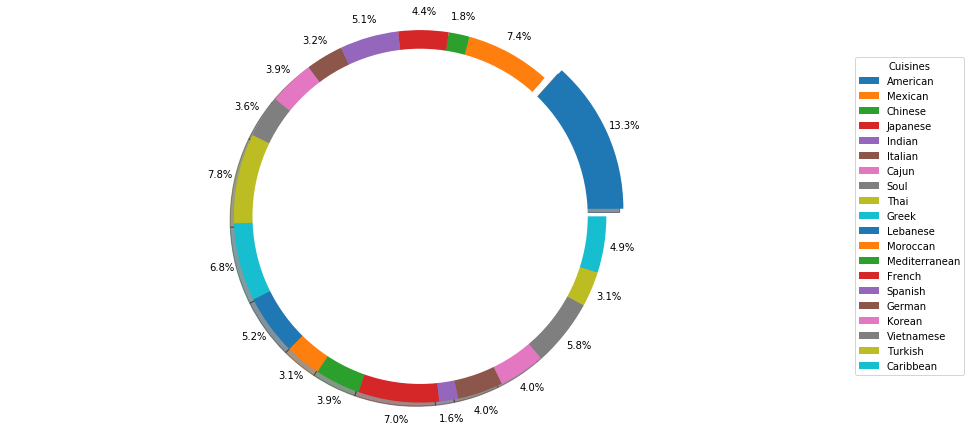

In [40]:
# Labels for the sections of our pie chart
food_type = yelp_format_rd1['search_cuisine'].unique()
food_type

variable = yelp_gb_cuisinescount['review_count'].sum()
variable
#cuisines_labels = yelp_format_rd1.groupby(['search_cuisine'])['review_count']
#cuisines_labels.head()

# The values of each section of the pie chart

#sizes = yelp_gb_cuisinescount['review_count']


# Tells matplotlib to seperate the "Python" section from the others
#actual pie chart showing which cusine is represented by reviews
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
#plt.title('Cusine % Comparison')
plt.pie(variable, labels=None,pctdistance=1.10, autopct="%1.1f%%", shadow=True, startangle= 0, explode=explode)
centre_circle = plt.Circle((0,0),0.90,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal') 
plt.tight_layout()
plt.legend(food_type,
           title="Cuisines",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig('donut.png')
plt.show()

In [41]:
variable

search_cuisine
American         658067
Cajun            364110
Caribbean         89118
Chinese          215002
French           251601
German           159661
Greek            194577
Indian           179826
Italian          384256
Japanese         332929
Korean           258820
Lebanese         153168
Mediterranean    192793
Mexican          345886
Moroccan          80659
Soul             195123
Spanish          197642
Thai             287367
Turkish          150554
Vietnamese       240561
Name: review_count, dtype: int64

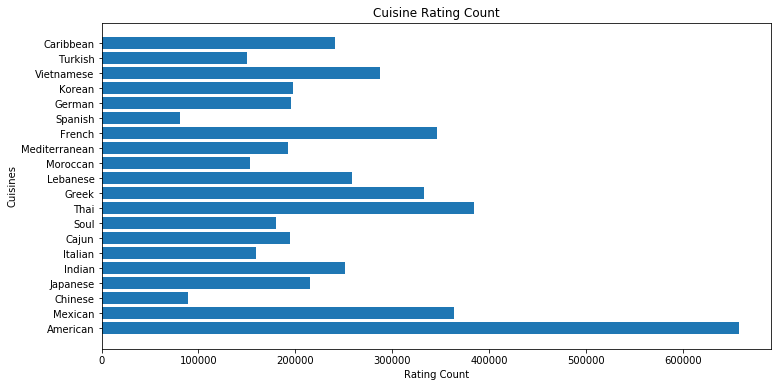

In [42]:
plt.barh(food_type,variable, align='center')
plt.xlabel('Rating Count')
plt.ylabel('Cuisines')
plt.title('Cuisine Rating Count')

plt.savefig('hbar.png', dpi=100)
plt.show()

In [43]:
df1 = yelp_format_rd1.groupby(['search_city','search_cuisine'])
df1 = pd.DataFrame(df1.count())
df1 = df1[['review_count']]
df1 = df1.reset_index()
df1 = df1[['search_city','review_count']]
df1 = df1.groupby(['search_city']).count()
df1 = df1.sort_values(['review_count'], ascending=True)

df1.head()

,review_count
search_city,
"Pierre, South Dakota",7
"Juneau, Alaska",13
"Bismarck, North Dakota",14
"Helena, Montana",16
"Springfield, Illinois",17


In [61]:


df1 = yelp_bus = yelp_format_rd1.groupby(['name','y_id'])
df1 = pd.DataFrame(df1.count())
df1 = df1[['review_count']]
df1 = df1.reset_index()
df1 = df1[['name','y_id','review_count']]
df1 = df1.groupby(['name']).count()
df1 = df1.sort_values(['review_count'], ascending=False)

df1.head(20)

,y_id,review_count
name,,
Panera Bread,104,104
Zoes Kitchen,59,59
Panda Express,44,44
Red Lobster,44,44
Taco Bell,42,42
Noodles & Company,35,35
Pizza Hut,29,29
Olive Garden Italian Restaurant,28,28
Taziki's Mediterranean Cafe,24,24
